## Keras Syntax Basics

With TensorFlow 2.0 , Keras is now the main API choice. Let's work through a simple regression project to understand the basics of the Keras syntax and adding layers.

### The Data

Let's pretend this data are measurements of some rare gem stones, with 2 measurement features and a sale price. Our final goal would be to try to predict the sale price of a new gem stone we just mined from the ground, in order to try to set a fair price in the market.

#### Load the Data

In [23]:
import pandas as pd

In [24]:
df = pd.read_csv('fake_reg.csv')

In [25]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


#### Explore the data

Let's take a quick look, we should see strong correlation between the features and the "price" of this made up product.

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

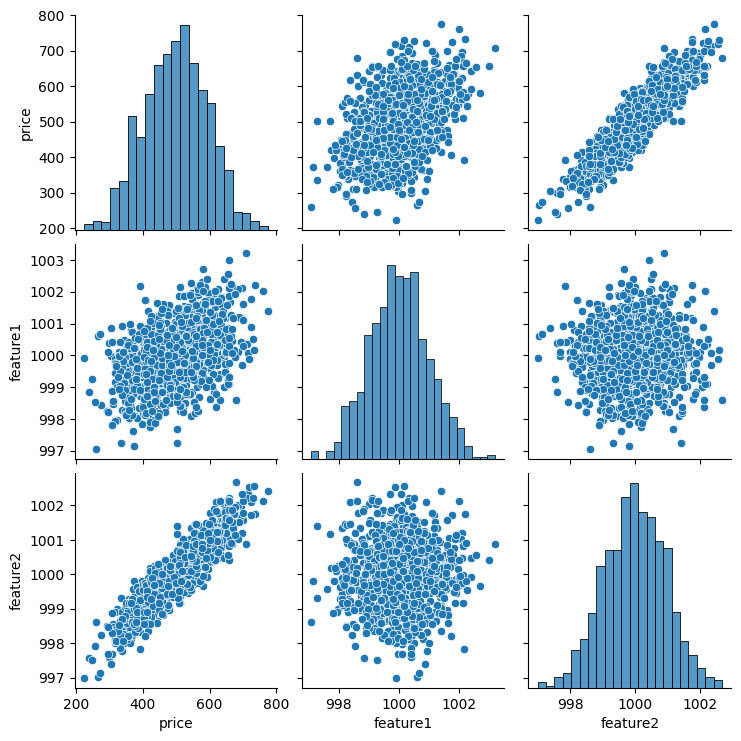

In [27]:
sns.pairplot(df)
plt.show()

### Test/Train Split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# Convert Pandas to Numpy for Keras

# Features
X = df[['feature1','feature2']].values

# Label
y = df['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [30]:
X_train.shape

(700, 2)

In [31]:
X_test.shape

(300, 2)

In [32]:
y_train.shape

(700,)

In [33]:
y_test.shape

(300,)

### Normalizing/Scaling the Data


In [34]:
# Notice to prevent data leakage from the test set, we only fit our scaler to the training set

### TensorFlow 2.0 Syntax


#### Import Libraries

In [1]:
! pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for tensorflow


In [2]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
from tensorflow.keras.model import Sequential
from tensorflow.keras.layers import Dense, Activation

SyntaxError: invalid syntax (1093338712.py, line 1)

## Creating a Model


### Model - adding in layers one by one

In [ ]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

Let's go ahead and build a simple model and then compile it by defining our solver

In [ ]:
print("X shape", X.shape)
print("Y shape", y.shape)

In [ ]:
model.fit(X_train, y_train, epochs=250)
model.history.history

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

## Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

In [ ]:
loss = model.history.history('loss')

NameError: name 'model' is not defined

In [ ]:
sns.lineplot(x=range(len(loss)), y=loss)
plt.title("Training Loss For Epoch")

### Compare final evaluation (MSE) on training set and test set.

These should hopefully be fairly close to each other.

### Further Evaluations

Let's compare to the real test labels!

# Predicting on brand new data

What if we just saw a brand new gemstone from the ground? What should we price it at? This is the **exact** same procedure as predicting on a new test data!

## Saving and Loading a Model